<div class="pull-right">
    ![alt text](https://cpfunam.files.wordpress.com/2012/07/fciencias1.png?w=240)
 </div>

# Solución de la ecuación de onda 

_Arcos Santiago Daniel Alberto_,
_Gaviño Bañuelos Ana Isabel_,
_Osorio Mejía Mariana Ailed_

## Ecuaciones diferenciales ##

Las ecuaciones diferenciales son ecuaciones matematicas que relacionan las derivadas de una ecuacion con la misma, son una herramienta escencial en la gran mayoría de las áreas de investigación, ya que ayuda a modelar fenómenos tanto biológicos, químicos y médicos, como económicos, sociales y, por supuesto, físicos; ya que estos pueden expresarse como las razones de cambio de sus variables. 

Pueden ser clasificadas como 


#### Linealidad #
Una ecuación es lineal cuando la máxima potencia de las derivadas de la ecuación diferencial es 1, no hay productos entre estas o la función. Las soluciones dichas ecuaciones pueden obtenerse a partir de combinaciones lineales de otras.

####  Orden #
El orden de una ecuación diferencial esta dado por la derivada de mayor orden.

####  Ecuaciones diferenciales ordinarias (EDO) ###
Involucran las derivadas de funciones de una sola variable independiente. 

####  Ecuaciones diferenciales parciales (EDP) ###
Contienen las derivadas parciales de funciones multivariadas.


En este proyecto nos centraremos en una de las EDPs mas representativas de la física: la ecuación de onda.

## Diferencias finitas ##

El método para encontrar la solución numérica de una ecuación diferencial que se basa en los siguientes pasos:
* Generar un conjunto finito de puntos del dominio, llamado malla
* Sustituir en los puntos donde desconocemos la solución, las derivadas con formulas de diferencias finitas centradas, de tal forma que se obtiene un sistema $$Au=f$$
* Se resuelve algebraicamente el sistema de ecuaciones resultante 

La aproximación a la primera derivada 
$$f′(x_i) = \frac{f_ {i+1} − f_{i−1}}{2∆x}$$
la aproximación a la segunda derivada usando diferencias centradas (con un error de truncamiento Oc(∆x2)) es
          $$f′′(x_i) = \frac{f(x_i − ∆x) − 2f(x_i) + f(x_i + ∆x)}{∆x^2}$$
o
$$f′′(x_i) = \frac{f_{i−1} − 2f_i + f_{i+1}}{∆x^2}$$ 


## Condiciones de Dirichlet 

Es un tipo de condiciones de fontera, es decir de contorno en la que estos se especifican.

Sea $f$ una EDP
$$ f(x)=(p(x)u′(x))′+q(x)u′(x)−r(x)u(x)--------(1)$$
en $$a≤x≤b$$ donde: $$u(a)=u_α$$ $$u(b)=u_β $$

Considerando el caso particular
$$u′′(x) = f(x),$$ $$0 ≤ x ≤ 1,$$ $$u(0) = u_α,$$ $$u(1) = u_β$$


Para usar el procedimiento general de solución numérica mediante el método de diferencias finitas, debemos de hacer:
1. Generamos la malla homogénea del dominio donde 
$$x_i =ih,$$ $$i=0,1,...,n,$$ $$h= 1/n =∆x$$

2. Sustituimos la derivada en cada punto $x_i$, obteniendo un sistema de ecuaciones


definiendo la solución aproximada de $u(x)$ en $x_i$ como $u_i$ como la solución del siguiente sistema lineal de ecuaciones

$$\frac{u_α −2_{u1} +u_2}{h^2}= f(x_1)$$
$$\frac{u_1 −2_{u2} +u_3}{h^2}= f(x_2)$$
$$.$$
$$.$$
$$.$$
$$\frac{u_{i−1} − 2_{ui} + u_{i+1}}{h^2}= f(x_i)$$ 
$$\frac{u_{n−3} − 2_{un−2} + u_{n−1}}{h^2}= f(x_{n−2})$$
$$\frac{u_{n−2} − 2_{un−1} + u_β}{h^2} = f(x_{n−1})$$


Este sistema de ecuaciones se puede escribir como 
$A=\left(\begin{array}{cccccc}
\frac{-2}{h^2} & \frac{1}{h^2} & . & . & . & .\\ 
\frac{1}{h^2}& \frac{-2}{h^2} & \frac{1}{h^2} & . & . & .\\ 
. & \frac{1}{h^2} & \frac{-2}{h^2} & \frac{1}{h^2} & . & .\\ 
. & . & . & . & . & .\\ 
. & . & . & . & . & .\\ 
. & . & . & . & \frac{1}{h^2} &\frac{-2}{h^2} 
\end{array}
\right)·\:\:
u=\left(\begin{array}{cccccc}
u_{1} \\ 
u_2 \\ 
  . \\ 
  . \\ 
u_{n-1} \\ 
\end{array}
\right)\:\:
=
\left(
\begin{array}{cccccc}
 f(x_1)-\frac{u_α}{h^2} \\
 f(x_2) \\
 . \\
 . \\
 . \\
 f(x_{n-1})-\frac{u_β}{h^2} \\
\end{array}
\right)=f
$

3. Resolviendo el sistema de ecuaciones, obtenemos la aproximación en cada punto de la malla. 
 $$[u_α, u_1, u_2, u_3, ··· u_{n−2}, u_{n−1}, u_β ]$$



Entonces, para $(1)$
$$p_i\frac{u_{i−1} −2u_i +u_{i+1}}{h^2} + q_i\frac{u_{i+1} −u_{i−1}}{2h}-r_iu_i =f_i$$ $$i=1,2,...,n.$$

## Ecuación de onda ##

Ecuación diferencial parcial, lineal, de segundo orden, que describe la propagación de ondas tanto electromagnéticas como mecáncas, está dada por 
$$\frac{\partial^{2}u }{\partial t^{2}}=c^{2}\Delta u$$

## Código

In [1]:
function f(x)
    -(pi^2)*cos(pi*x)
    end 

f (generic function with 1 method)

In [2]:
using PyPlot    


In [3]:
function onda(Y0,Y1,a,c,M,f)
#a; Inicio dominio
#c;  Fin dominio
#M;  Partición
#Y0;  Condición inicial en el inicio del dominio
#Y1;  Condición inicial en el fin del dominio

    
N=M-2; # Nodos interiores
h=(c-a)/(M-1); # Incremento en la malla
A=zeros(N,N); # Matriz A
b=zeros(N); # Vector b
R=1/(h^2);
P=-2/(h^2);
Q=1/(h^2);
# Primer renglon de la matriz A y vector b
A[1,1]=P;
A[1,2]=Q;
b[1]=f(a)-Y0*R;
# Relglon final de la matriz A y vector b
A[N,N-1]=R;
A[N,N]=P;
b[N]=f(a+h*N)-Y1*Q;
#Renglones intermedios de la matriz A y vector b
for i=2:N-1
A[i,i-1]=R;
A[i,i]=P;
A[i,i+1]=Q;
b[i]=f(a+h*(i-1));
end
x=inv(A)*b;
x
end 


onda (generic function with 1 method)

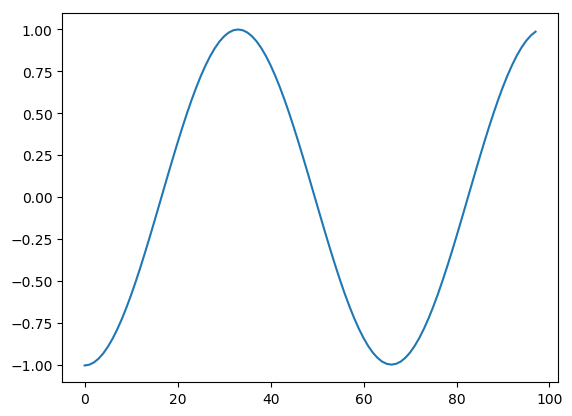

In [11]:
list1=onda(-1,1,-1,2,100,f);
plot(real(list1))
show();

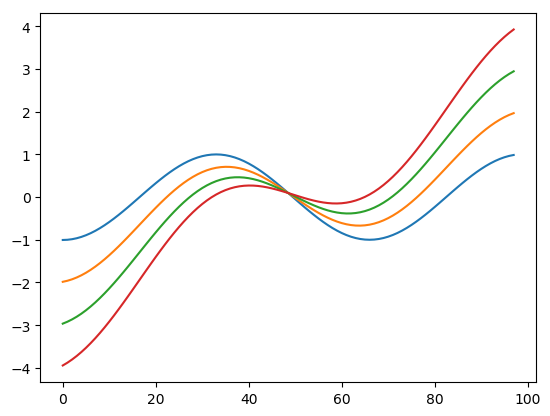

In [8]:
list1=onda(-1,1,-1,2,100,f);
list2=onda(-2,2,-1,2,100,f);
list3=onda(-3,3,-1,2,100,f);
list4=onda(-4,4,-1,2,100,f);

plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();


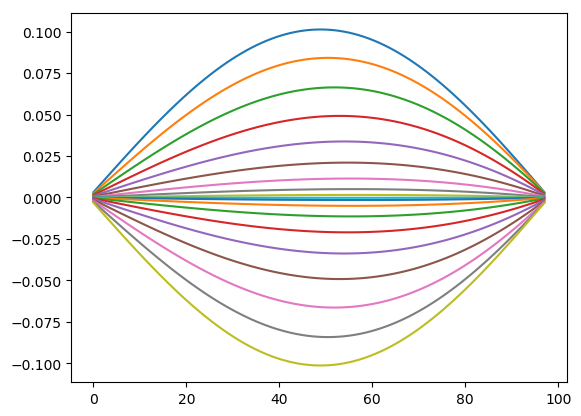

In [6]:
list11=onda(0,0,0,-1,100,x->sin(pi*x));
list22=onda(0,0,0,-.9,100,x->sin(pi*x));
list33=onda(0,0,0,-.8,100,x->sin(pi*x));
list44=onda(0,0,0,-.7,100,x->sin(pi*x));
list55=onda(0,0,0,-.6,100,x->sin(pi*x));
list66=onda(0,0,0,-.5,100,x->sin(pi*x));
list77=onda(0,0,0,-.4,100,x->sin(pi*x));
list88=onda(0,0,0,-.3,100,x->sin(pi*x));
list99=onda(0,0,0,-.2,100,x->sin(pi*x));
list111=onda(0,0,0,.1,100,x->sin(pi*x));
list222=onda(0,0,0,.2,100,x->sin(pi*x));
list333=onda(0,0,0,.3,100,x->sin(pi*x));
list444=onda(0,0,0,.4,100,x->sin(pi*x));
list555=onda(0,0,0,.5,100,x->sin(pi*x));
list666=onda(0,0,0,.6,100,x->sin(pi*x));
list777=onda(0,0,0,.7,100,x->sin(pi*x));
list888=onda(0,0,0,.8,100,x->sin(pi*x));
list999=onda(0,0,0,.9,100,x->sin(pi*x));
list1111=onda(0,0,0,1,100,x->sin(pi*x));
plot(real(list11))
plot(real(list22))
plot(real(list33))
plot(real(list44))
plot(real(list55))
plot(real(list66))
plot(real(list77))
plot(real(list88))
plot(real(list99))
plot(real(list111))
plot(real(list222))
plot(real(list333))
plot(real(list444))
plot(real(list555))
plot(real(list666))
plot(real(list777))
plot(real(list888))
plot(real(list999))
plot(real(list1111))
show();

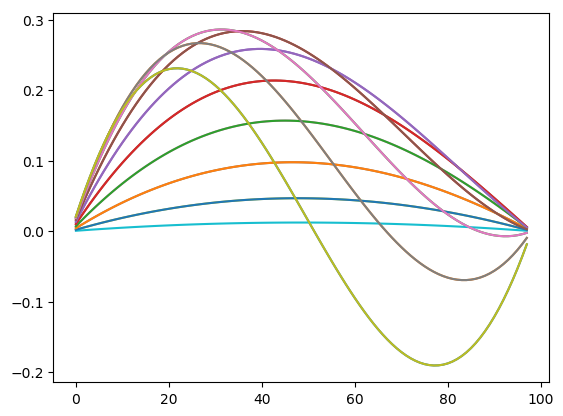

In [7]:
list11=onda(0,0,0,-1,100,f);
list22=onda(0,0,0,-.9,100,f);
list33=onda(0,0,0,-.8,100,f);
list44=onda(0,0,0,-.7,100,f);
list55=onda(0,0,0,-.6,100,f);
list66=onda(0,0,0,-.5,100,f);
list77=onda(0,0,0,-.4,100,f);
list88=onda(0,0,0,-.3,100,f);
list99=onda(0,0,0,-.2,100,f);
list111=onda(0,0,0,.1,100,f);
list222=onda(0,0,0,.2,100,f);
list333=onda(0,0,0,.3,100,f);
list444=onda(0,0,0,.4,100,f);
list555=onda(0,0,0,.5,100,f);
list666=onda(0,0,0,.6,100,f);
list777=onda(0,0,0,.7,100,f);
list888=onda(0,0,0,.8,100,f);
list999=onda(0,0,0,.9,100,f);
list1111=onda(0,0,0,1,100,f);
plot(real(list11))
plot(real(list22))
plot(real(list33))
plot(real(list44))
plot(real(list55))
plot(real(list66))
plot(real(list77))
plot(real(list88))
plot(real(list99))
plot(real(list111))
plot(real(list222))
plot(real(list333))
plot(real(list444))
plot(real(list555))
plot(real(list666))
plot(real(list777))
plot(real(list888))
plot(real(list999))
plot(real(list1111))
show();